In [2]:
show_img = 5
save_fig = False

import numpy as np
import matplotlib.pyplot as plt
import random
from keras.models import load_model

In [3]:
def standardize_data(train_images):
    train_images[train_images < 0] = 0
    st_dev = np.std(train_images)
    mean = np.mean(train_images)
    train_images = np.divide(np.subtract(train_images, mean), st_dev)
    return train_images

Load modelsuccess...
31/31 [==============================] - 2s 51ms/step


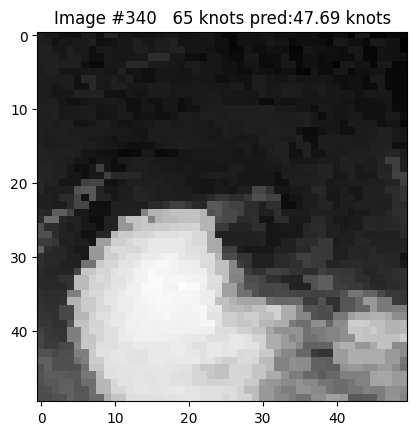

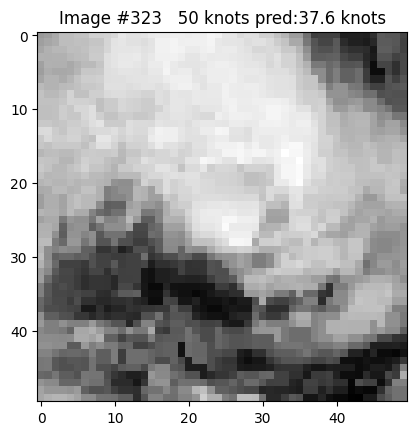

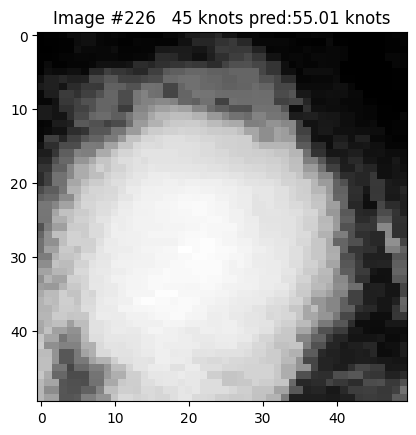

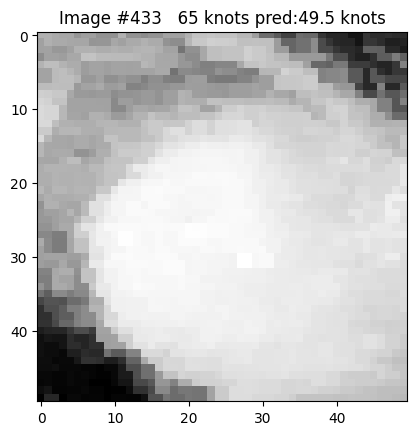

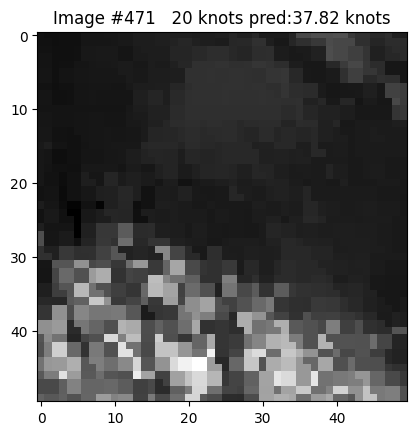

In [5]:
images = np.load('images.npy')
labels = np.load('labels.npy')

if show_img > images.shape[0]:
    raise ValueError("Exceed image numbers!!")



model = load_model('/Users/opopligher1996/workspace/master/BusinessIntelligenceTechniquesAndApplications_DSME6756/project/DSME6756_Group_Project/Section_2/cyclone_intensity/code/2_fold_model.h5')  # load your .h5 file
print("Load modelsuccess...")

# Predict
pred = model.predict(standardize_data(images))
flat_pred = pred.flatten()


for x in range(show_img):
    i = random.randint(0, images.shape[0])
    image = np.reshape(images[i], (images[i].shape[0], images[i].shape[1]))
    plt.figure(x+1)
    plt.imshow(image, cmap='binary')
    title = 'Image #' + str(i) + '   ' + str(labels[i]) + ' knots pred:' + str(round(flat_pred[i],2)) + ' knots'
    plt.title(title)

    if save_fig:
        plt.savefig('Image' + str(i) + '_pred_knots_.png')
  
    plt.show()